# Practice Project 4   
# ABALONE AGE CASE STUDY

## Importing libraries

In [135]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from scipy.stats import zscore
import pickle

## Loading Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Checking basic details of data set 

In [7]:
#checking datatypes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Observation  
1.Sex is categorical variable  
2.Length, Diameter, Height, Whole weight, shucked weight, viscera weight, shell weight, are continuous variable  
3.Rings is target variable

In [9]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Observation  
There are no Null values

In [10]:
#basic stats
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation  
1 We have 0 in height column in minimum this indicates that there is/are zer/zeroes in the respective column(We'll recheck)  
2 Features are very close normality

In [12]:
#checking number of zeroes 
(df==0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Height has 2 zeroes

In [13]:
#checking which rows have zero
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


We can replace these zeroes by average or mean.

In [14]:
avg = pd.pivot_table(df,index=['Sex'],aggfunc={'Height':np.mean})
avg

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [15]:
df['Height'] = df['Height'].replace(to_replace=0,value =0.107996 )

## EXPLORATORY DATA ANALYSIS 

### 1. Label Encoding 

In [18]:
LE=LabelEncoder()

df_le=LE.fit_transform(df['Sex'])
pd.Series(df_le)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

Female - 0  
Infant - 1  
Male - 2

In [19]:
df['Sex']=df_le

In [20]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### 2. Checking and removing outliers

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

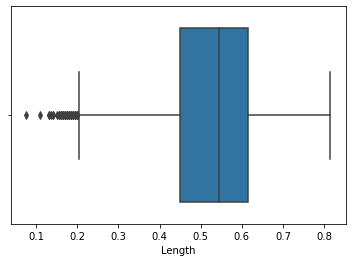

In [22]:
sns.boxplot(df['Length'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

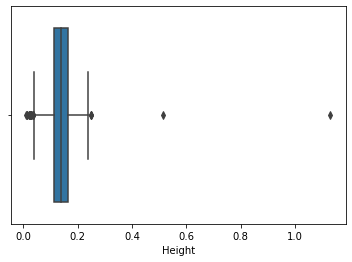

In [23]:
sns.boxplot(df['Height'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Whole weight'>

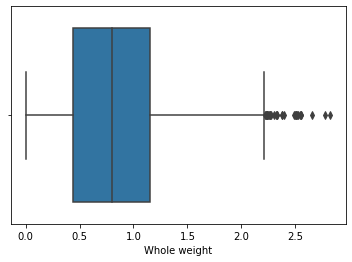

In [24]:
sns.boxplot(df['Whole weight'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked weight'>

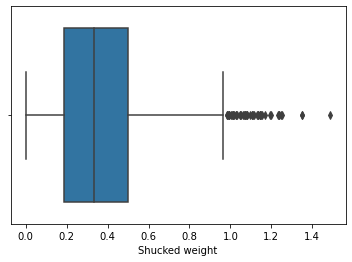

In [25]:
sns.boxplot(df['Shucked weight'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight'>

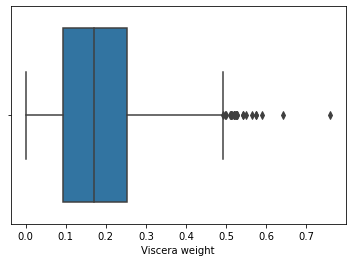

In [26]:
sns.boxplot(df['Viscera weight'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shell weight'>

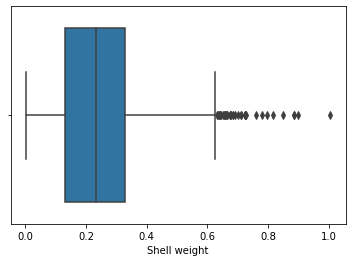

In [27]:
sns.boxplot(df['Shell weight'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

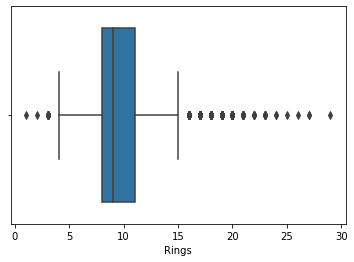

In [28]:
sns.boxplot(df['Rings'])

Observation  
Almost all the columns have outliers 

In [56]:
#removing skewness using z score

zscore1 = zscore(df)
abs_z = np.abs(zscore1)

df_new = df[(abs_z < 3).all(axis=1)] #taking 3 as threshold value

In [57]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### 3. Skewness

In [70]:
df_x=df_new.drop(["Rings"],axis=1)
df_x.skew()

Sex              -0.094816
Length           -0.621961
Diameter         -0.597677
Height           -0.243246
Whole weight      0.334719
Shucked weight    0.458771
Viscera weight    0.437599
Shell weight      0.349333
dtype: float64

In [72]:
df_new1=power_transform(df_x)

df_new1=pd.DataFrame(df_new1,columns=df_x.columns)

df_new1.skew()

Sex              -0.174466
Length           -0.082999
Diameter         -0.080963
Height           -0.015921
Whole weight     -0.016725
Shucked weight    0.021906
Viscera weight    0.036024
Shell weight      0.016666
dtype: float64

Skewness removed

### 4. Correlation

In [73]:
a_corr=df_new1.corr()
a_corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Sex,1.000000,-0.064840,-0.068998,-0.067379,-0.056995,-0.040839,-0.066039,-0.064402
Length,-0.064840,1.000000,0.981691,0.881463,0.970782,0.953454,0.949517,0.946628
Diameter,-0.068998,0.981691,1.000000,0.889422,0.969016,0.946766,0.944194,0.953332
Height,-0.067379,0.881463,0.889422,1.000000,0.907492,0.865644,0.890179,0.913911
Whole weight,-0.056995,0.970782,0.969016,0.907492,1.000000,0.976965,0.973837,0.968097
Shucked weight,-0.040839,0.953454,0.946766,0.865644,0.976965,1.000000,0.944365,0.916428
Viscera weight,-0.066039,0.949517,0.944194,0.890179,0.973837,0.944365,1.000000,0.935504
Shell weight,-0.064402,0.946628,0.953332,0.913911,0.968097,0.916428,0.935504,1.000000


<AxesSubplot:>

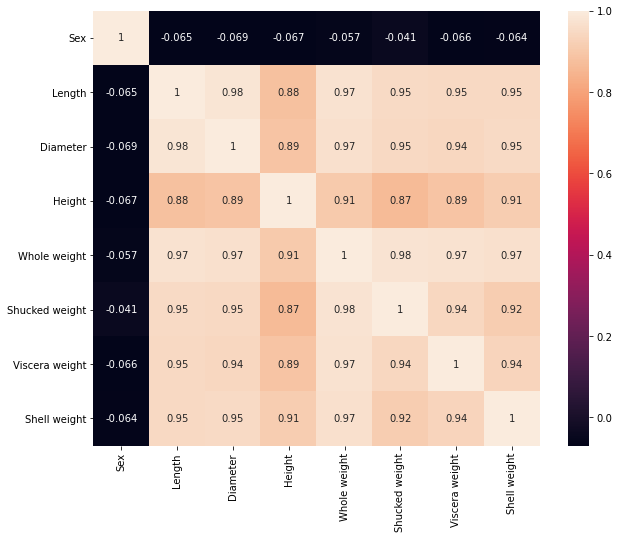

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(a_corr,annot=True)

### 5. VIF

In [79]:
X=df_new.drop(columns=["Rings"])
Y=df_new['Rings']

In [80]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [81]:
Y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4029, dtype: int64

In [82]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)


In [86]:
VIF=pd.DataFrame()
VIF["quality"]=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
VIF["feature"]=X.columns

In [87]:
VIF

,quality,feature
0,1.009215,Sex
1,38.960157,Length
2,40.425655,Diameter
3,6.547245,Height
4,106.107449,Whole weight
5,28.256849,Shucked weight
6,17.055458,Viscera weight
7,22.765707,Shell weight


In [88]:
df_new.drop(columns=["Whole weight"],inplace=True)
df_new

C:\Users\HP\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


In [93]:
X_new=df_new.drop(columns=["Rings"])


scaler=StandardScaler()
X_scaler=scaler.fit_transform(X_new)


VIF=pd.DataFrame()
VIF["quality"]=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
VIF["feature"]=X_new.columns

In [94]:
VIF

,quality,feature
0,1.009107,Sex
1,38.960114,Length
2,40.416181,Diameter
3,6.544969,Height
4,9.228508,Shucked weight
5,10.760610,Viscera weight
6,10.125007,Shell weight


## TRAIN AND TEST 

In [95]:
df_new

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


In [96]:
A=df_new.drop(columns=["Rings"])
B=df_new['Rings']

In [97]:
A

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960


In [98]:
B

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4029, dtype: int64

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
accu_max=0
RS_max=0


for i in range(30,100):
    A_train, A_test,B_train, B_test=train_test_split(A_scaled,B,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(A_train,B_train)
    pred=LR.predict(A_test)
    predrf=LR.predict(A_test)
    acc=r2_score(B_test,pred)
    if acc>accu_max:
        accu_max=acc
        RS_max=i

print("Best accuracy is", accu_max,"on Random State",RS_max)

Best accuracy is 0.5386441975928713 on Random State 39


## TESTING

In [124]:
 A_train, A_test,B_train, B_test=train_test_split(A_scaled,B,test_size=.25,random_state=39)

LINEAR REGRESSION

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR=LinearRegression()

LR.fit(A_train,B_train)
pred_LR=LR.predict(A_test)

R2_score = r2_score(B_test,pred_LR)

SCR=cross_val_score(LR,A,B,cv=5)
cross_val=SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.5386441975928713
cross validation score =  0.3996825975077253


DECISION TREE CLASSIFIER

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier()

DT.fit(A_train,B_train)
pred_DT=DT.predict(A_test)

R2_score = r2_score(B_test,pred_DT)

SCR=cross_val_score(DT,A,B,cv=5)
cross_val=SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.14168654146857673
cross validation score =  0.19608371992663717


RANDOM FOREST CLASSIFIER

In [130]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

RF.fit(A_train,B_train)
pred_RF=RF.predict(A_test)

R2_score = r2_score(B_test,pred_RF)

SCR=cross_val_score(RF,A,B,cv=5)
cross_val=SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.3563238724011394
cross validation score =  0.24746173882218764


## HYPER PARAMETER TUNING 

In [131]:
#splitting the data into train and test
A_train, A_test,B_train,B_test=train_test_split(A_scaled,B,test_size=0.25,random_state=10)

In [132]:

RF_reg=RandomForestClassifier()
RF_reg.fit(A_train, B_train)

RandomForestClassifier()

In [133]:
res = RF_reg.predict(A_test)

## saving

In [137]:
Decision_tree_model= RandomForestClassifier()
Decision_tree_model.fit(A_train,B_train)

n_o_f='final_model.pickle'
pickle.dump(Decision_tree_model,open(n_o_f,'wb'))
